 ## <u>Pandas para usuarios de Excel</u>

 ### PyConAr 2019

 #### Por Fernando Gonzalez Prada
 @fgonzalezprada

#### Temario

1) Razones por las cuales es una buena idea complementar Excel con Python y Pandas

2) Como leemos hojas de Excel en Python y Pandas

3) Que es un Dataframe

4) Creación de columnas calculadas

5) Filtrado de datos

6) Agrupación y sumarización de datos

7) Uniendo las tablas con 'merge'

8) Creación de Pivot Table con Pandas

9) Leyendo información con formato irregular

### 1) Razones por las cuales es una buena idea complementar Excel con Python y Pandas

* Excel no funciona correctamente cuando trabajamos con grandes conjuntos de datos.
* Las planillas no escalan bien cuando los volúmenes de datos crecen en el tiempo.
* Más allá de usar macros, es muy manual el proceso de generar información reproducible.

* Si la información no está bien estructurada, se hace muy difícil trabajarla con Excel.
* No tiene funcionalidades analíticas robustas.
* En algunos países hay regulaciones que limitan el uso de planillas de cálculos para determinados informes legales.

* No están diseñadas para uso colaborativo.
* Propensas al fraude por la falta de niveles de permisos y control de código fuente / fórmulas.
* Sujetas a errores humanos triviales, difíciles de descubrir.
* Es difícil de consolidar la información cuando empiezan a surgir muchas planillas desde diferentes sectores.

### 2) Como leemos hojas de Excel en Python y Pandas
#### Pandas es una de las mejores librerías de Python para manipular y analizar datos

Anaconda es una de la distribuciones más fáciles de instalar y utilizar

https://www.anaconda.com/distribution/

In [1]:
# cargamos las librerías que vamos a utilizar
import warnings
warnings.filterwarnings('ignore')

# importamos pandas con alias 'pd'
import pandas as pd

Importamos el encabezado de las órdenes emitidas y las guardamos en el dataframe **encabezado**

In [2]:
encabezado = pd.read_excel('data.xlsx', sheet_name='encabezado')

Con **read_excel** podemos leer hojas de Excel. Otra opción sería leerlas de un archivo .csv con **read_csv**, lo cual es mucho más rápido.

In [ ]:
encabezado = pd.read_csv('encabezado.csv', sep='\t')

### 3) Que es un Dataframe?

Con **head** vemos los primeros registros

In [3]:
encabezado.tail(10)

,SalesOrderID,OrderDate,SalesOrderNumber,CustomerID
31455,75114,30/6/2014,SO75114,24704
31456,75115,30/6/2014,SO75115,26832
31457,75116,30/6/2014,SO75116,16402
31458,75117,30/6/2014,SO75117,18178
31459,75118,30/6/2014,SO75118,13671
31460,75119,30/6/2014,SO75119,11981
31461,75120,30/6/2014,SO75120,18749
31462,75121,30/6/2014,SO75121,15251
31463,75122,30/6/2014,SO75122,15868
31464,75123,30/6/2014,SO75123,18759


**shape** nos indica la cantidad de filas y columnas del dataframe

In [4]:
encabezado.shape

(31465, 4)

In [5]:
encabezado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31465 entries, 0 to 31464
Data columns (total 4 columns):
SalesOrderID        31465 non-null int64
OrderDate           31465 non-null object
SalesOrderNumber    31465 non-null object
CustomerID          31465 non-null int64
dtypes: int64(2), object(2)
memory usage: 983.4+ KB


También podemos importar solo las columnas que nos interesen, usando **usecols** y una lista con las columnas deseadas.

In [6]:
cols = ['SalesOrderID', 'OrderDate', 'CustomerID']
encabezado = pd.read_csv('encabezado.csv', sep='\t', usecols=cols)

In [7]:
encabezado.head()

,SalesOrderID,OrderDate,CustomerID
0,43659,31/5/2011,29825
1,43660,31/5/2011,29672
2,43661,31/5/2011,29734
3,43662,31/5/2011,29994
4,43663,31/5/2011,29565


Ahora leemos la hoja **detalle**, con el detalle de las órdenes de venta.

In [8]:
detalle = pd.read_csv('detalle.csv', sep='\t')
#detalle = pd.read_excel('data.xlsx', sheet_name='detalle')

In [9]:
detalle.shape

(121317, 6)

In [10]:
detalle.head()

,SalesOrderID,SalesOrderDetailID,ProductID,OrderQty,UnitPrice,UnitPriceDiscount
0,43659,1,776,1,2024.994,0.0
1,43659,2,777,3,2024.994,0.0
2,43659,3,778,1,2024.994,0.0
3,43659,4,771,1,2039.994,0.0
4,43659,5,772,1,2039.994,0.0


In [11]:
detalle.describe()

,SalesOrderID,SalesOrderDetailID,ProductID,OrderQty,UnitPrice,UnitPriceDiscount
count,121317.000000,121317.000000,121317.000000,121317.000000,121317.000000,121317.000000
mean,57827.363782,60659.000000,841.680836,2.266080,465.093496,0.002826
std,9009.147902,35021.345641,86.452124,2.491323,751.885081,0.024811
min,43659.000000,1.000000,707.000000,1.000000,1.328200,0.000000
25%,49884.000000,30330.000000,768.000000,1.000000,21.490000,0.000000
50%,57029.000000,60659.000000,863.000000,1.000000,49.990000,0.000000
75%,65490.000000,90988.000000,921.000000,3.000000,602.346000,0.000000
max,75123.000000,121317.000000,999.000000,44.000000,3578.270000,0.400000


### 4) Creación de columnas calculadas

Creamos la columna **ItemTotal**, con el importe total de cada item: PrecioUnitario * Cantidad - Descuento

In [12]:
detalle['ItemTotal'] = detalle['UnitPrice'] * detalle['OrderQty'] * (1 - detalle['UnitPriceDiscount'])

In [13]:
detalle.head()

,SalesOrderID,SalesOrderDetailID,ProductID,OrderQty,UnitPrice,UnitPriceDiscount,ItemTotal
0,43659,1,776,1,2024.994,0.0,2024.994
1,43659,2,777,3,2024.994,0.0,6074.982
2,43659,3,778,1,2024.994,0.0,2024.994
3,43659,4,771,1,2039.994,0.0,2039.994
4,43659,5,772,1,2039.994,0.0,2039.994


Verificamos que los descuentos estén bien calculados.

Una forma de filtrar datos de un dataframe, es con la función **query**

### 5) Filtrado de datos

* Método **query**

In [14]:
detalle.query('UnitPriceDiscount != 0.0').head(10)

,SalesOrderID,SalesOrderDetailID,ProductID,OrderQty,UnitPrice,UnitPriceDiscount,ItemTotal
802,43875,803,773,12,1971.9942,0.02,23190.651792
804,43875,805,775,13,1957.4942,0.02,24938.476108
859,43879,860,712,13,5.0136,0.02,63.873264
880,43881,881,709,21,5.2250,0.05,104.238750
915,43884,916,772,14,1971.9942,0.02,27055.760424
1038,43898,1039,770,13,405.4770,0.02,5165.776980
1050,43898,1051,715,11,27.8790,0.02,300.535620
1144,43906,1145,709,26,4.7500,0.10,111.150000
1643,44098,1644,709,22,5.2250,0.05,109.202500
1659,44100,1660,777,11,1957.4942,0.02,21101.787476


Si queremos ver la cantidad de valores únicos de una columna, usamos **unique**

In [15]:
detalle['UnitPriceDiscount'].unique()

array([0.  , 0.02, 0.05, 0.1 , 0.35, 0.3 , 0.15, 0.2 , 0.4 ])

Y con **value_counts** podemos ver la cantidad de valores únicos para cada valor de una columna

In [16]:
detalle['SalesOrderID'].value_counts()

51721    72
51739    72
53465    71
51160    71
47355    68
51120    67
57046    67
55297    66
47395    66
51090    66
46616    65
47369    65
51751    65
46981    65
58918    65
57061    65
51748    64
51822    62
53560    62
51774    62
53536    61
53518    61
71794    61
55249    61
69422    61
51131    60
47366    60
46614    60
69437    60
53527    59
         ..
46665     1
53126     1
57092     1
61314     1
63361     1
44874     1
46921     1
48968     1
51015     1
69438     1
44810     1
46857     1
48904     1
50951     1
55045     1
59139     1
44618     1
46793     1
48840     1
50887     1
52934     1
54981     1
69310     1
71357     1
44682     1
46729     1
50823     1
61058     1
63105     1
45078     1
Name: SalesOrderID, Length: 31465, dtype: int64

* Opción con filtro de valores con indexado booleano:

El primer paso es crear el índice booleano, donde Pandas va a marcar si cada fila cumple o no la condición

In [17]:
detalle['SalesOrderID'] == 43659

0          True
1          True
2          True
3          True
4          True
5          True
6          True
7          True
8          True
9          True
10         True
11         True
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
121287    False
121288    False
121289    False
121290    False
121291    False
121292    False
121293    False
121294    False
121295    False
121296    False
121297    False
121298    False
121299    False
121300    False
121301    False
121302    False
121303    False
121304    False
121305    False
121306    False
121307    False
121308    False
121309    False
121310    False
121311    False
121312    False
121313    False
121314    False
121315    False
121316    False
Name: SalesOrderID, Leng

Y como 2° y último paso, para que podamos mostrar los valores filtrados correctamente, tenemos que pasarle los valores verdaderos al dataframe

In [18]:
orde443659 = detalle[detalle['SalesOrderID'] == 43659]
orde443659.head()

,SalesOrderID,SalesOrderDetailID,ProductID,OrderQty,UnitPrice,UnitPriceDiscount,ItemTotal
0,43659,1,776,1,2024.994,0.0,2024.994
1,43659,2,777,3,2024.994,0.0,6074.982
2,43659,3,778,1,2024.994,0.0,2024.994
3,43659,4,771,1,2039.994,0.0,2039.994
4,43659,5,772,1,2039.994,0.0,2039.994


### 6) Agrupación y sumarización de datos
    
Usando Pandas **groupby**

In [19]:
detalle.groupby('SalesOrderID')['ItemTotal'].sum()

SalesOrderID
43659    20565.6206
43660     1294.2529
43661    32726.4786
43662    28832.5289
43663      419.4589
43664    24432.6088
43665    14352.7713
43666     5056.4896
43667     6107.0820
43668    35944.1562
43669      714.7043
43670     6122.0820
43671     8128.7876
43672     6124.1820
43673     3746.2015
43674     2624.3820
43675     5716.3102
43676    14203.4580
43677     7793.1108
43678     9799.9243
43679     1316.0575
43680    11397.4992
43681    13787.5434
43682     3875.7229
43683    42813.4333
43684     5596.4705
43685     2736.5678
43686     3463.2998
43687     1258.3767
43688    12718.0844
            ...    
75094        7.9500
75095       53.9900
75096       88.9700
75097       44.9800
75098       37.2700
75099       72.9300
75100       78.4800
75101      133.4900
75102      119.9800
75103       39.9800
75104       12.9400
75105       98.9600
75106        7.2800
75107       56.9700
75108        4.9900
75109       85.4800
75110       84.9200
75111       48.9700
75112  

In [20]:
detalle.groupby('SalesOrderID')['ItemTotal'].agg([sum, max])

,sum,max
SalesOrderID,,
43659,20565.6206,6074.9820
43660,1294.2529,874.7940
43661,32726.4786,8099.9760
43662,28832.5289,5248.7640
43663,419.4589,419.4589
43664,24432.6088,8099.9760
43665,14352.7713,4049.9880
43666,5056.4896,2146.9620
43667,6107.0820,2039.9940


In [21]:
# detalle.groupby('SalesOrderID')['ItemTotal'].describe()

#### Importamos los clientes

In [22]:
clientes = pd.read_csv('clientes.csv', sep='\t')
#clientes = pd.read_excel('data.xlsx', sheet_name='cliente')

In [23]:
clientes.head()

,CustomerID,CustomerName
0,1,Customer 1
1,2,Customer 2
2,7,Customer 7
3,19,Customer 19
4,20,Customer 20


In [24]:
clientes.shape

(19820, 2)

In [25]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19820 entries, 0 to 19819
Data columns (total 2 columns):
CustomerID      19820 non-null int64
CustomerName    19820 non-null object
dtypes: int64(1), object(1)
memory usage: 309.8+ KB


#### Importamos los productos

In [26]:
productos = pd.read_csv('productos.csv', sep='\t')
#productos = pd.read_excel('data.xlsx', sheet_name='producto')

In [27]:
productos.head()

,ProductID,ProductName,ProductSubCategory,ProductCategory
0,680,"HL Road Frame - Black, 58",Road Frames,Components
1,706,"HL Road Frame - Red, 58",Road Frames,Components
2,707,"Sport-100 Helmet, Red",Helmets,Accessories
3,708,"Sport-100 Helmet, Black",Helmets,Accessories
4,709,"Mountain Bike Socks, M",Socks,Clothing


In [28]:
productos.shape

(295, 4)

In [29]:
productos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 4 columns):
ProductID             295 non-null int64
ProductName           295 non-null object
ProductSubCategory    295 non-null object
ProductCategory       295 non-null object
dtypes: int64(1), object(3)
memory usage: 9.3+ KB


### 7) Uniendo las tablas con 'merge'

#### Utilizamos el método merge para unir la tabla **detalle** con la tabla  **encabezado** 

Usamos la columna **SalesOrderID** para unir ambas tablas

In [30]:
ventas = detalle.merge(encabezado, left_on='SalesOrderID', right_on='SalesOrderID')

In [31]:
ventas.shape

(121317, 9)

In [32]:
ventas.head()

,SalesOrderID,SalesOrderDetailID,ProductID,OrderQty,UnitPrice,UnitPriceDiscount,ItemTotal,OrderDate,CustomerID
0,43659,1,776,1,2024.994,0.0,2024.994,31/5/2011,29825
1,43659,2,777,3,2024.994,0.0,6074.982,31/5/2011,29825
2,43659,3,778,1,2024.994,0.0,2024.994,31/5/2011,29825
3,43659,4,771,1,2039.994,0.0,2039.994,31/5/2011,29825
4,43659,5,772,1,2039.994,0.0,2039.994,31/5/2011,29825


Eliminamos el campo **SalesOrderDetailID** ya que no tiene valor, es un identificador de fila

In [33]:
ventas.drop(['SalesOrderDetailID'], axis=1, inplace=True)

In [34]:
ventas.head()

,SalesOrderID,ProductID,OrderQty,UnitPrice,UnitPriceDiscount,ItemTotal,OrderDate,CustomerID
0,43659,776,1,2024.994,0.0,2024.994,31/5/2011,29825
1,43659,777,3,2024.994,0.0,6074.982,31/5/2011,29825
2,43659,778,1,2024.994,0.0,2024.994,31/5/2011,29825
3,43659,771,1,2039.994,0.0,2039.994,31/5/2011,29825
4,43659,772,1,2039.994,0.0,2039.994,31/5/2011,29825


#### Utilizamos el método merge para obtener el numero de cliente desde la tabla Encabezado

In [35]:
ventas = ventas.merge(clientes, left_on='CustomerID', right_on='CustomerID')

In [36]:
ventas.head()

,SalesOrderID,ProductID,OrderQty,UnitPrice,UnitPriceDiscount,ItemTotal,OrderDate,CustomerID,CustomerName
0,43659,776,1,2024.994,0.0,2024.994,31/5/2011,29825,Customer 29825
1,43659,777,3,2024.994,0.0,6074.982,31/5/2011,29825,Customer 29825
2,43659,778,1,2024.994,0.0,2024.994,31/5/2011,29825,Customer 29825
3,43659,771,1,2039.994,0.0,2039.994,31/5/2011,29825,Customer 29825
4,43659,772,1,2039.994,0.0,2039.994,31/5/2011,29825,Customer 29825


#### Traemos el nombre del producto y sus categorías

In [37]:
ventas = ventas.merge(productos, left_on='ProductID', right_on='ProductID')

In [38]:
ventas.shape

(121317, 12)

In [39]:
ventas.head()

,SalesOrderID,ProductID,OrderQty,UnitPrice,UnitPriceDiscount,ItemTotal,OrderDate,CustomerID,CustomerName,ProductName,ProductSubCategory,ProductCategory
0,43659,776,1,2024.994,0.0,2024.994,31/5/2011,29825,Customer 29825,"Mountain-100 Black, 42",Mountain Bikes,Bikes
1,45061,776,2,2024.994,0.0,4049.988,1/12/2011,29825,Customer 29825,"Mountain-100 Black, 42",Mountain Bikes,Bikes
2,43661,776,4,2024.994,0.0,8099.976,31/5/2011,29734,Customer 29734,"Mountain-100 Black, 42",Mountain Bikes,Bikes
3,45038,776,2,2024.994,0.0,4049.988,1/12/2011,29734,Customer 29734,"Mountain-100 Black, 42",Mountain Bikes,Bikes
4,45780,776,2,2024.994,0.0,4049.988,29/2/2012,29734,Customer 29734,"Mountain-100 Black, 42",Mountain Bikes,Bikes


### 8) Creación de Pivot Table con Pandas

La función de agregación por defecto es la media

In [40]:
pd.pivot_table(ventas, index=["ProductCategory"])

,CustomerID,ItemTotal,OrderQty,ProductID,SalesOrderID,UnitPrice,UnitPriceDiscount
ProductCategory,,,,,,,
Accessories,20141.891052,30.880053,1.503423,854.514638,62173.679492,19.694542,0.000815
Bikes,25717.643102,2364.446871,2.254952,846.652544,55043.685769,1254.661543,0.006593
Clothing,25093.912172,99.118562,3.443489,809.426007,57806.260447,32.105126,0.002027
Components,29813.438229,631.222232,2.622954,839.667879,54235.683923,251.376475,0.000106


Acá ajustamos la cantidad de columnas, el formato y la función de agregación

In [41]:
pd.options.display.float_format = '${:,.0f}'.format

pivot = pd.pivot_table(ventas, 
                       index=["ProductCategory"],
                       values=["ItemTotal"],
                       aggfunc=sum)
pivot

,ItemTotal
ProductCategory,
Accessories,"$1,272,073"
Bikes,"$94,651,173"
Clothing,"$2,120,543"
Components,"$11,802,593"


También podemos filtrar la pivot table

In [42]:
pivot.query('ProductCategory == ["Bikes"]')

,ItemTotal
ProductCategory,
Bikes,"$94,651,173"


Ahora configuramos las columnas

In [43]:
pd.pivot_table(ventas,
               index=["ProductCategory"], 
               columns= ['ProductSubCategory'],
               values=["ItemTotal"],
               aggfunc=sum)

ItemTotal                                           \
ProductSubCategory Bib-Shorts Bike Racks Bike Stands Bottles and Cages   
ProductCategory                                                          
Accessories              $nan   $237,096     $39,591           $64,275   
Bikes                    $nan       $nan        $nan              $nan   
Clothing             $167,559       $nan        $nan              $nan   
Components               $nan       $nan        $nan              $nan   

                                                                              \
ProductSubCategory Bottom Brackets  Brakes    Caps Chains Cleaners Cranksets   
ProductCategory                                                                
Accessories                   $nan    $nan    $nan   $nan  $18,407      $nan   
Bikes                         $nan    $nan    $nan   $nan     $nan      $nan   
Clothing                      $nan    $nan $51,229   $nan     $nan      $nan   
Components                 $51,826 $66,019    $nan $9,378     $nan  $203,943   

                    ...                                                \
ProductSubCategory  ... Road Frames Saddles   Shorts   Socks   Tights   
ProductCategory     ...                                                 
Accessories         ...        $nan    $nan     $nan    $nan     $nan   
Bikes               ...        $nan    $nan     $nan    $nan     $nan   
Clothing            ...        $nan    $nan $413,601 $29,745 $203,149   
Components          ...  $3,851,351 $55,829     $nan    $nan     $nan   

                                                                          \
ProductSubCategory Tires and Tubes Touring Bikes Touring Frames    Vests   
ProductCategory                                                            
Accessories               $246,455          $nan           $nan     $nan   
Bikes                         $nan   $14,296,291           $nan     $nan   
Clothing                      $nan          $nan           $nan $259,488   
Components                    $nan          $nan     $1,642,328     $nan   

                             
ProductSubCategory   Wheels  
ProductCategory              
Accessories            $nan  
Bikes                  $nan  
Clothing               $nan  
Components         $680,831  

[4 rows x 35 columns]

Y reemplazamos los $nan con 0

In [44]:
pd.pivot_table(ventas,
               index=["ProductCategory"], 
               columns= ['ProductSubCategory'],
               values=["ItemTotal"], 
               fill_value=0,
               aggfunc=sum)

ItemTotal                                           \
ProductSubCategory Bib-Shorts Bike Racks Bike Stands Bottles and Cages   
ProductCategory                                                          
Accessories                $0   $237,096       39591           $64,275   
Bikes                      $0         $0           0                $0   
Clothing             $167,559         $0           0                $0   
Components                 $0         $0           0                $0   

                                                                              \
ProductSubCategory Bottom Brackets  Brakes    Caps Chains Cleaners Cranksets   
ProductCategory                                                                
Accessories                     $0      $0      $0     $0  $18,407        $0   
Bikes                           $0      $0      $0     $0       $0        $0   
Clothing                        $0      $0 $51,229     $0       $0        $0   
Components                 $51,826 $66,019      $0 $9,378       $0  $203,943   

                    ...                                                \
ProductSubCategory  ... Road Frames Saddles   Shorts   Socks   Tights   
ProductCategory     ...                                                 
Accessories         ...          $0      $0       $0      $0       $0   
Bikes               ...          $0      $0       $0      $0       $0   
Clothing            ...          $0      $0 $413,601 $29,745 $203,149   
Components          ...  $3,851,351 $55,829       $0      $0       $0   

                                                                          \
ProductSubCategory Tires and Tubes Touring Bikes Touring Frames    Vests   
ProductCategory                                                            
Accessories               $246,455            $0             $0       $0   
Bikes                           $0   $14,296,291             $0       $0   
Clothing                        $0            $0             $0 $259,488   
Components                      $0            $0     $1,642,328       $0   

                             
ProductSubCategory   Wheels  
ProductCategory              
Accessories              $0  
Bikes                    $0  
Clothing                 $0  
Components         $680,831  

[4 rows x 35 columns]

### 9) Leyendo información con formato irregular

In [45]:
pop = pd.read_excel('Country Population by Year.xlsx', sheet_name='Sheet1')
pop

,"Total population is based on the de facto definition of population, which counts all residents regardless of legal status or citizenship--except for refugees not permanently settled in the country of asylum, who are generally considered part of the population of their country of origin. The values shown are midyear estimates.",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,Source,http://data.worldbank.org/indicator/SP.POP.TOTL,$nan,$nan,$nan,$nan,$nan,$nan,$nan,$nan,$nan,$nan,$nan,$nan,$nan,$nan,$nan
1,Terms of use,http://data.worldbank.org/summary-terms-of-use,$nan,$nan,$nan,$nan,$nan,$nan,$nan,$nan,$nan,$nan,$nan,$nan,$nan,$nan,$nan
2,NaN,NaN,$nan,$nan,$nan,$nan,$nan,$nan,$nan,$nan,$nan,$nan,$nan,$nan,$nan,$nan,$nan
3,Country Name,1999,"$2,000","$2,001","$2,002","$2,003","$2,004","$2,005","$2,006","$2,007","$2,008","$2,009","$2,010","$2,011","$2,012","$2,013","$2,014"
4,Canada,30499200,"$30,769,700","$31,081,900","$31,362,000","$31,676,000","$31,995,000","$32,312,000","$32,570,505","$32,887,928","$33,245,773","$33,628,571","$34,005,274","$34,342,780","$34,754,312","$35,158,304","$35,540,419"
5,Germany,82100243,"$82,211,508","$82,349,925","$82,488,495","$82,534,176","$82,516,260","$82,469,422","$82,376,451","$82,266,372","$82,110,097","$81,902,307","$81,776,930","$81,797,673","$80,425,823","$80,645,605","$80,889,505"
6,France,60496715,"$60,912,498","$61,357,431","$61,805,267","$62,244,884","$62,704,897","$63,179,356","$63,621,376","$64,016,229","$64,374,990","$64,707,044","$65,027,512","$65,342,776","$65,639,975","$65,925,498","$66,206,930"
7,Mexico,101266570,"$102,808,590","$104,239,563","$105,578,297","$106,888,418","$108,257,822","$109,747,906","$111,382,857","$113,139,374","$114,972,821","$116,815,612","$118,617,542","$120,365,271","$122,070,963","$123,740,109","$125,385,833"
8,USA,279040000,"$282,162,411","$284,968,955","$287,625,193","$290,107,933","$292,805,298","$295,516,599","$298,379,912","$301,231,207","$304,093,966","$306,771,529","$309,347,057","$311,721,632","$314,112,078","$316,497,531","$318,857,056"


Descartamos las primeras 4 filas

In [46]:
pop = pd.read_excel('Country Population by Year.xlsx', sheet_name='Sheet1', skiprows=4)
pop

,Country Name,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Canada,30499200,30769700,31081900,31362000,31676000,31995000,32312000,32570505,32887928,33245773,33628571,34005274,34342780,34754312,35158304,35540419
1,Germany,82100243,82211508,82349925,82488495,82534176,82516260,82469422,82376451,82266372,82110097,81902307,81776930,81797673,80425823,80645605,80889505
2,France,60496715,60912498,61357431,61805267,62244884,62704897,63179356,63621376,64016229,64374990,64707044,65027512,65342776,65639975,65925498,66206930
3,Mexico,101266570,102808590,104239563,105578297,106888418,108257822,109747906,111382857,113139374,114972821,116815612,118617542,120365271,122070963,123740109,125385833
4,USA,279040000,282162411,284968955,287625193,290107933,292805298,295516599,298379912,301231207,304093966,306771529,309347057,311721632,314112078,316497531,318857056


#### Ordenando con 'melt' para que los datos queden en formato 'Tidy'

* Queremos que la primer columna sea el país
* Que la segunda sean los años
* Y la tercera tenga la población por año y país

In [47]:
pop_pivot = pd.melt(pop, id_vars=['Country Name'])
pop_pivot.head(10)

,Country Name,variable,value
0,Canada,1999,30499200
1,Germany,1999,82100243
2,France,1999,60496715
3,Mexico,1999,101266570
4,USA,1999,279040000
5,Canada,2000,30769700
6,Germany,2000,82211508
7,France,2000,60912498
8,Mexico,2000,102808590
9,USA,2000,282162411


In [48]:
pop_tidy = pd.melt(pop, 
                   id_vars=['Country Name'], 
                   var_name='Year', 
                   value_name='Population')
pop_tidy.head(20)

,Country Name,Year,Population
0,Canada,1999,30499200
1,Germany,1999,82100243
2,France,1999,60496715
3,Mexico,1999,101266570
4,USA,1999,279040000
5,Canada,2000,30769700
6,Germany,2000,82211508
7,France,2000,60912498
8,Mexico,2000,102808590
9,USA,2000,282162411


In [49]:
pop_tidy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 3 columns):
Country Name    80 non-null object
Year            80 non-null object
Population      80 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.0+ KB


Convertimos **year** a numérico y creamos **Pop(M)**, para poder graficar la población en millones

In [50]:
pd.options.display.float_format = '{:,.0f}'.format
pop_tidy['Year'] = pop_tidy['Year'].astype('int64')
pop_tidy['Pop(M)'] = pop_tidy['Population'] /1000000

In [51]:
pop_tidy.head()

,Country Name,Year,Population,Pop(M)
0,Canada,1999,30499200,30
1,Germany,1999,82100243,82
2,France,1999,60496715,60
3,Mexico,1999,101266570,101
4,USA,1999,279040000,279


Por último creamos 2 gráficos muy simples

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

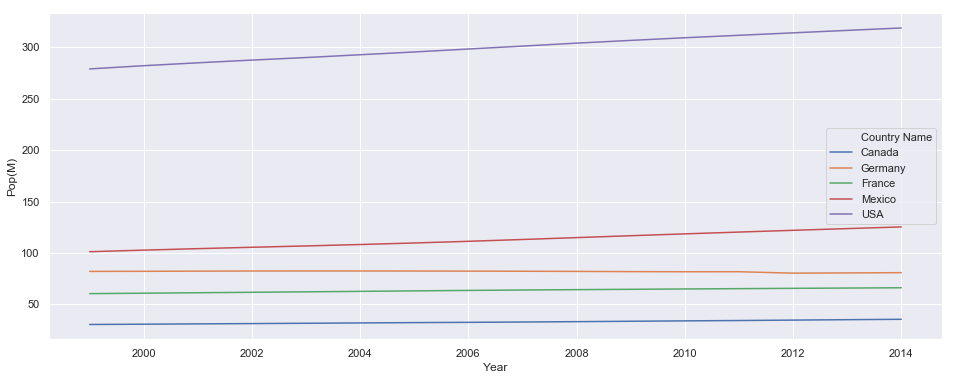

In [53]:
sns.set_style("darkgrid")
plt.figure(figsize=(16, 6))

ax = sns.lineplot(x="Year", y="Pop(M)", 
                  hue="Country Name",
                  data=pop_tidy)
ax

In [54]:
pop_tidy_new = pop_tidy[pop_tidy['Year']>=2010]
pop_tidy_new

,Country Name,Year,Population,Pop(M)
55,Canada,2010,34005274,34
56,Germany,2010,81776930,82
57,France,2010,65027512,65
58,Mexico,2010,118617542,119
59,USA,2010,309347057,309
60,Canada,2011,34342780,34
61,Germany,2011,81797673,82
62,France,2011,65342776,65
63,Mexico,2011,120365271,120
64,USA,2011,311721632,312


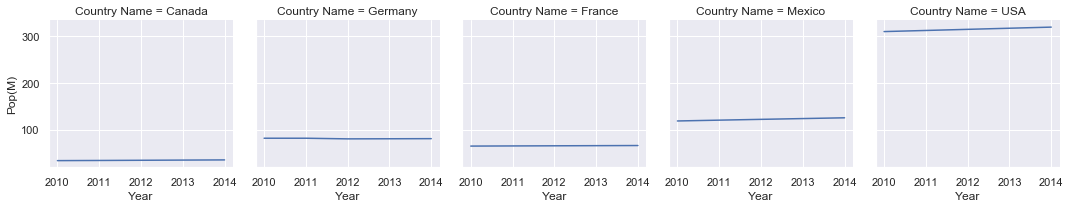

In [55]:
g = sns.FacetGrid(pop_tidy_new, col="Country Name")
g = g.map(plt.plot, "Year", "Pop(M)")

Pueden bajar el código y los datasets completos en mi GitHub:

https://github.com/fsgp/PyConAr-2019

# Gracias!!!